## Steps to solve an ODE with solve_ ivp:

dy/dt = f(t, y)
y0 = y_0

(1) Import solve ivp from the scipy, integrate module
(2) Define the function, f, for the right-hand side of the ODE
    -- Make sure ODE is in standard form
    -- function arguments: f(t, y, [parameters))
(3) Create an array of the initial and final time: t_span = [t_begins, t_ends]
    -- The solver will choose its own internal tine points!
(4) Define an array with the value of the initial condition: y_0 = [value]
    -- Must be an array!
     (5) Find the solution using solve ivp
    -- solution = solve_ivp(function name, t_span, y_0)

  Returns a dictionary object with:
      -- t: time points
      -- y: array of the values of the solution at t
      other values: (see documentation)

  link to more info about odeint:
  https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

See also: https://www.youtube.com/watch?v=Gg--FOdupwY

# Task 1.0

In [312]:
# (1) Import solve ivp from the scipy, integrate module
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
import numpy as np

In [660]:
# (3) Create an array of the initial and final time: t_span = [t_begins, t_ends]
a = -5
b = 6
t = np.array([a, b])

# (4a) Define an array with the value of the initial condition: y_0 = [value]
y0 = np.array([np.exp(5)])
# (4b) Define an array with the values to be evaluated
t_eval = np.arange(a, b, 0.5)

In [364]:
# (2) Define the function, f, for the right-hand side of the ODE
def simple_function(t, y):
    return -y # y' = -e^(-t) = -y

# (5a) Find the solution using solve ivp without certain values
# solution = solve_ivp(simple_function, t , y0)

# (5b) Find the solution using solve ivp with certain values
solution = solve_ivp(simple_function, t , y0, t_eval = t_eval)

In [365]:
# (5c) Get results
t = solution.t
print(f't: {t}')

t: [-5 -4 -3 -2 -1  0  1  2  3  4  5]


In [366]:
# (5c) Get results
y = solution.y
print(f'y: {y}')

y: [[1.48413159e+02 5.46367913e+01 2.01082231e+01 7.39932519e+00
  2.72283647e+00 1.00212618e+00 3.68911527e-01 1.35831889e-01
  5.00124178e-02 1.84081985e-02 6.77399601e-03]]


In [367]:
# The exact solution
t_exact = t
y_exact = np.array([np.exp(-t)])
print(f't_exact:\n {t_exact}')
print(f'y_exact:\n {y_exact}')

t_exact:
 [-5 -4 -3 -2 -1  0  1  2  3  4  5]
y_exact:
 [[1.48413159e+02 5.45981500e+01 2.00855369e+01 7.38905610e+00
  2.71828183e+00 1.00000000e+00 3.67879441e-01 1.35335283e-01
  4.97870684e-02 1.83156389e-02 6.73794700e-03]]


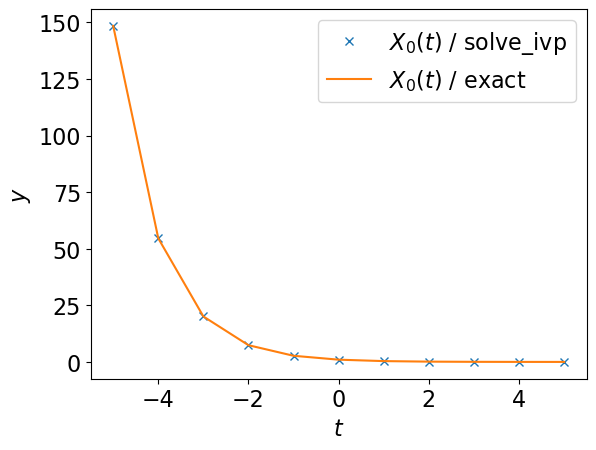

In [373]:
# Plot the answer
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.plot(t, y[0], 'x', label=f'$X_{0}(t)$ / solve_ivp')
plt.plot(t_exact, y_exact[0], '-', label=f'$X_{0}(t)$ / exact')
plt.legend()
plt.show()

# Task 1.1, 1.2, 1.3

In [497]:
# (1) Import solve ivp from the scipy, integrate module
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
import numpy as np

In [572]:
# (3) Create an array of the initial and final time: t_span = [t_begins, t_ends]
t = np.arange(1800, 2205, 5)

# (4a) Define an array with the value of the initial condition: y_0 = [value]
y0 = np.array([3.018])

# Manual entries
data_t = np.array([1800, 1850, 1900, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015])
data_p = np.array([1, 1.262, 1.650, 2.525, 2.758, 3.018, 3.322, 3.682, 4.061, 4.440, 4.853, 5.310, 5.735, 6.127, 6.520, 6.930, 7.349])

# Exponential function without ode
def exponential(t):
    t0 = 1960
    y0 = 3.018
    b_minus_m = 0.02
    return y0 * np.exp(b_minus_m * (t - t0))

In [573]:
# (2) Define the function, f, for the right-hand side of the ODE
def exponential_ode(t, y0):
    t0 = 1960
    b_minus_m = 0.02
    return b_minus_m * y0 * np.exp(b_minus_m * (t - t0))

def logistic_ode(t, y):
    g = 0.029
    p = 2.941e-3
    return y * (g - p * y)

# (5a) Find the solution using solve ivp without certain values
# solution_exponetial_ode = solve_ivp(exponential_ode, t , y0)
solution_logistic_ode = solve_ivp(logistic_ode, t , y0)

# (5b) Find the solution using solve ivp with certain values
# solution = solve_ivp(simple_function, t , y0, t_eval = t_eval)

In [574]:
# (5c) Get results
solution_exponential_ode = solution.t
solution_logistic_ode = solution.t
print(f'solution_exponential_ode: t:\n {solution_exponential_ode}')
print(f'solution_logistic_ode: t:\n {solution_logistic_ode}')

solution_exponential_ode: t:
 [1800.         1800.18966065]
solution_logistic_ode: t:
 [1800.         1800.18966065]


In [561]:
# (5c) Get results
print(f'solution_exponential_ode: y: {y}')
print(f'solution_logistic_ode: y: {y}')

solution_exponential_ode: y: [[3.018      3.04137642]]
solution_logistic_ode: y: [[3.018      3.04137642]]


In [562]:
# The exact solution -> There is no exact solution
"""
t_exact = t
y_exact = ??????
print(y_exact)
"""

'\nt_exact = t\ny_exact = ??????\nprint(y_exact)\n'

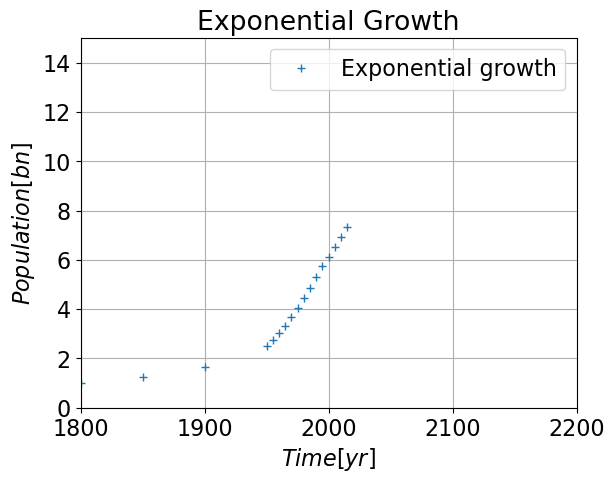

In [662]:
# Plot the answer
plt.xlabel('$Time [yr]$')
plt.ylabel('$Population [bn]$')
# plt.plot(t, exponential(t), 'x')
# Manual entries
plt.plot(data_t, data_p, '+')
# plt.plot(t, y[0], 'x')
plt.title('Exponential Growth')
plt.xlim([1800, 2200])
plt.ylim([0, 15])
plt.grid()
plt.legend([ 'Exponential growth', 'Estimated World Population Data'])
plt.show()

# Task 1.4 Hausaufgabe

In [383]:
# (1) Import solve ivp from the scipy, integrate module
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
import numpy as np

In [384]:
# (3) Create an array of the initial and final time: t_span = [t_begins, t_ends]
t = np.array([1960, 1960])

# (4a) Define an array with the value of the initial condition: y_0 = [value]
y0 = np.array([3.018])
# (4b) Define an array with the values to be evaluated
t_eval = np.arange(-5, 5)

In [385]:
# (2) Define the function, f, for the right-hand side of the ODE
def simple_function(t, y):
    g = np.array([0.01, 0.01, 0.05])
    p = np.array([0.001, 0.001, 0.005])
    return (g - p * y) * y

# (5a) Find the solution using solve ivp without certain values
solution = solve_ivp(simple_function, t, y0)

# (5b) Find the solution using solve ivp with certain values
# solution = solve_ivp(simple_function, t , y0, t_eval = t_eval)

In [386]:
# (5c) Get results
t = solution.t
print(f't: {t}')

t: [1960. 1960.]


In [387]:
# (5c) Get results
y = solution.y
print(f'y: {y}')

y: [[3.018 3.018]]


In [388]:
# The exact solution
t_exact = t
y_exact = y * np.exp(b_minus_m * (t - t0))
print(y_exact)

[[3.018 3.018]]


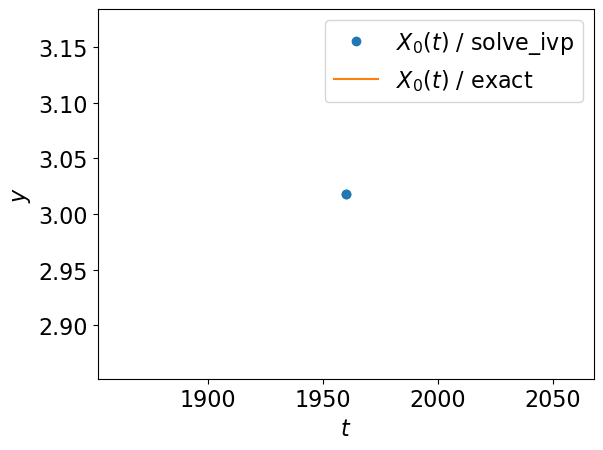

In [389]:
# Plot the answer
for i in range(y.shape[0]):
    plt.plot(t, y[i], 'o', label=f'$X_{0}(t)$ / solve_ivp')
for i in range(y_exact.shape[0]):
    plt.plot(t_exact, y_exact[0], '-', label=f'$X_{0}(t)$ / exact')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()
plt.show()

# Task 1.5

In [ ]:
# (1) Import solve ivp from the scipy, integrate module
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
import numpy as np

In [611]:
y0 = np.array([50, 30])
a = 0
b = 40
t = np.array([a, b])
t_eval = np.arange(a, b, 0.001)


In [612]:
def lotkavolterra(t, y0):
    g1 =  0.5   # 1/yr
    g2 =  0.8   # 1/yr
    g3 =  0.008 # 1/yr
    return [g1 * y0[0] - g3 * y0[0] * y0[1], -g2 * y0[1] + g3 * y0[0] * y0[1]]

solution = solve_ivp(lotkavolterra, t, y0, t_eval = t_eval )

In [613]:
# (5c) Get results
t = solution.t
print(f't: {t}')

t: [0.0000e+00 1.0000e-03 2.0000e-03 ... 3.9997e+01 3.9998e+01 3.9999e+01]


In [614]:
# (5c) Get results
y = solution.y
print(f'y: {y}')

y: [[ 50.          50.01300409  50.02601636 ...  45.06408034  45.04722605
   45.03039461]
 [ 30.          29.98800396  29.97601584 ... 109.2889513  109.2409235
  109.19290204]]


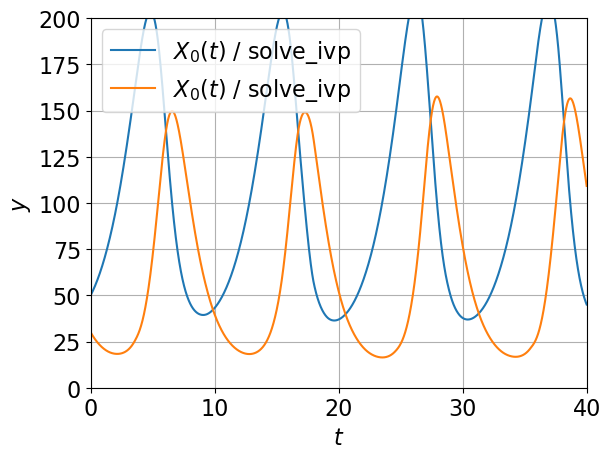

In [615]:
# Plot the answer
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.plot(t, y[0], '-', label=f'$X_{0}(t)$ / solve_ivp')
plt.plot(t, y[1], '-', label=f'$X_{0}(t)$ / solve_ivp')
plt.xlim([0, 40])
plt.ylim([0, 200])
plt.grid()
plt.legend()
plt.show()


(Text(67.5, 110.0, 'Fixed Point'), Text(0.5, 1.0, 'Phase Space'))

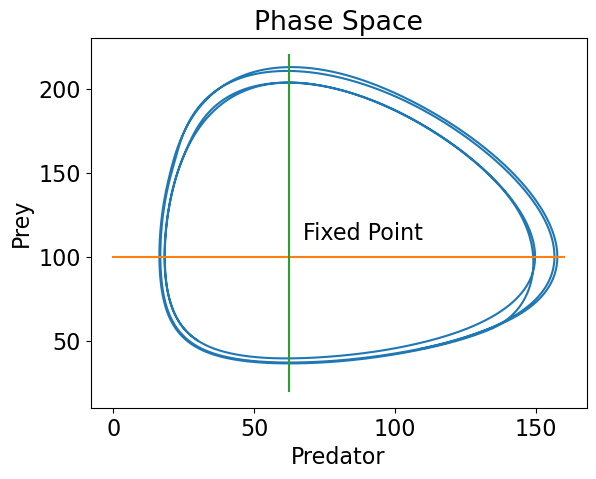

In [619]:
# Plot phase space
g1 = 0.5
g2 = 0.8
g3 = 0.008
Y1 = g2/g3
Y2 = g1/g3
plt.plot(solution.y[1],solution.y[0],[0,160],[Y1,Y1],[Y2,Y2],[20,220]),plt.xlabel('Predator'),plt.ylabel('Prey')
plt. text (Y2+5,Y1+10, 'Fixed Point'), plt. title ('Phase Space')

# Task 1.6

In [658]:
# (1) Import solve ivp from the scipy, integrate module
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
import numpy as np

In [650]:
y0 = np.array([50, 30])
a = 0
b = 200
t = np.array([a, b])
t_eval = np.arange(a, b, 0.001)

In [651]:
def lotkavolterra(t, y0):
    g1 =  0.5   # 1/yr
    g2 =  0.8   # 1/yr
    g3 =  0.008 # 1/yr
    g4 =  0.0005 # 1/yr
    # return [g1 * y0[0] - g3 * y0[0] * y0[1], -g2 * y0[1] + g3 * y0[0] * y0[1]]
    return [g1 * y0[0] - g3 * y0[0] * y0[1] - g4 * y0[0] * y0[0] , -g2 * y0[1] + g3 * y0[0] * y0[1]]

solution = solve_ivp(lotkavolterra, t, y0, t_eval = t_eval )

In [652]:
# (5c) Get results
t = solution.t
print(f't: {t}')

t: [0.00000e+00 1.00000e-03 2.00000e-03 ... 1.99997e+02 1.99998e+02
 1.99999e+02]


In [653]:
# (5c) Get results
y = solution.y
print(f'y: {y}')

y: [[50.         50.01175363 50.02351454 ... 99.14052512 99.14128097
  99.14203708]
 [30.         29.98800381 29.97601524 ... 55.35093875 55.35055833
  55.35017826]]


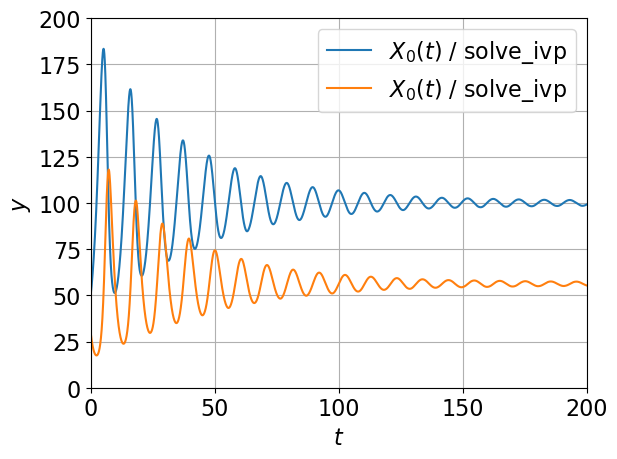

In [656]:
# Plot the answer
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.plot(t, y[0], '-', label=f'$X_{0}(t)$ / solve_ivp')
plt.plot(t, y[1], '-', label=f'$X_{0}(t)$ / solve_ivp')
plt.xlim([0, 200])
plt.ylim([0, 200])
plt.grid()
plt.legend()
plt.show()

(Text(67.5, 110.0, 'Fixed Point'), Text(0.5, 1.0, 'Phase Space'))

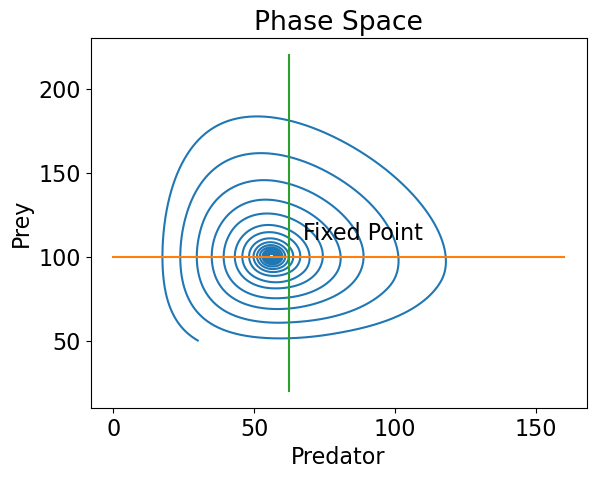

In [657]:
# Plot phase space
g1 = 0.5
g2 = 0.8
g3 = 0.008
Y1 = g2/g3
Y2 = g1/g3
plt.plot(solution.y[1],solution.y[0],[0,160],[Y1,Y1],[Y2,Y2],[20,220]),plt.xlabel('Predator'),plt.ylabel('Prey')
plt. text (Y2+5,Y1+10, 'Fixed Point'), plt. title ('Phase Space')

# Difference between Task 1.5 and Task 1.6
- In task 1.6, the amplitudes of the periodical fluctuations of the population sizes decrease for pray and predator.
- Looking at the plots, it looks like as the population size fluctuations will cease with time.
- In task 1.5 the amplitudes of the periodical fluctuation stay the same.

# Task 1.7

# Task 1.8

# Test

In [552]:
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]


In [553]:
sol = solve_ivp(lotkavolterra, [0, 15], [10, 5], args=(1.5, 1, 3, 1), dense_output=True)

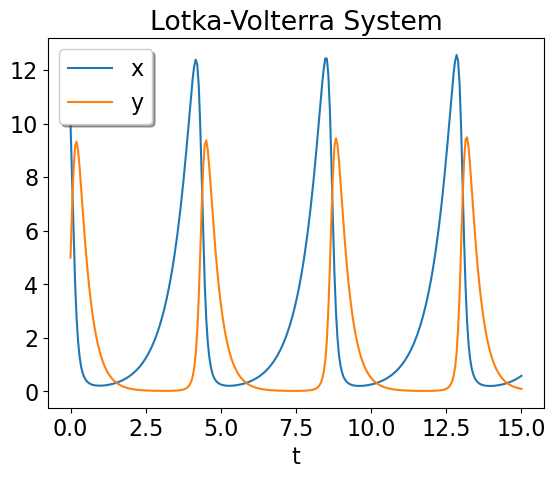

In [554]:
t = np.linspace(0, 15, 300)

z = sol.sol(t)

plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()

In [555]:
# Parallel Computing Using Python
# Mit numpy ohne expliziter aber implizieter Parallelisierung
import time
import numpy as np
n = 500
a = np.zeros(n)
tic=time.perf_counter()
for i in np. arange (n) :
    test = np.random.rand(n,n)
    w,v = np.linalg.eig(test)
    a[i]=np.max(np.abs(w))
toc=time.perf_counter()
print (f"Computing time: {toc-tic:0.4f} seconds")

# Computing time: 71.5413 seconds

Computing time: 70.9260 seconds


In [556]:
# Parallel Computing Using Python
# Ohne numpy ohne Parallelisierung
import time
n=20000
def processInput(i): return i**i
inputs = range(n)
# Sequential
tic=time.perf_counter()
results_seq = [processInput(i) for i in inputs]
toc=time.perf_counter()
print(f"Computing time using sequential computing:{toc-tic:0.4f} seconds")

# Computing time using sequential computing:33.3612 seconds

Computing time using sequential computing:35.3536 seconds


In [557]:
# Parallel Computing Using Python
# Ohne numpy mit Parallelisierung
import time
import multiprocessing as mp
from joblib import Parallel, delayed
n=20000
def processInput(i): return i**i
inputs = range(n)
# Parallel
num_cores = mp.cpu_count()
print('Number of prcessors: ', num_cores)
tic=time.perf_counter()
results_par = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in inputs)
toc=time.perf_counter()
print(f"Computing time using parallel computing: {toc-tic:0.4f}seconds")

# Number of prcessors:  16
# Computing time using parallel computing: 6.9736seconds

Number of prcessors:  16
Computing time using parallel computing: 7.7797seconds
